### (EDA) of the Obesity Estimation Dataset

This report presents an exploratory data analysis (EDA) of [the Obesity Estimation Dataset](http://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition), which includes behavioral, physical, and lifestyle attributes of individuals.

**FAVC** &rarr;  Do you eat high caloric food frequently?                        
**FCVC** &rarr;  Do you usually eat vegetables in your meals?                            
**NCP** &rarr;   How many main meals do you have daily?     
**CAEC** &rarr; Do you eat any food between meals?          
**SMOKE** &rarr; Do you smoke?           
**CH2O** &rarr;  Consumption of water daily     
**SCC** &rarr;   Calories consumption monitoring    
**FAF** &rarr;  Physical activity frequency      
**TUE** &rarr;  Time using technology devices                 
**CALC** &rarr;  Consumption of alcohol        
**MTRANS** &rarr;  Transportation used  

The goal was to identify patterns that may contribute to obesity and overweight conditions.

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 


In [117]:
df = pd.read_csv('OneDrive/Desktop/Python_Projects/ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [118]:
df['Weight'] =df['Weight'] * 2.20462 # Weight is in kilogram Convert it it to lb
df['Height'] =df['Height'] * 3.281 # Height is in meters Convert it to ft

In [119]:
df[['Age', 'Height', 'Weight', # These rows are floats changed then to int, easier to work with
    'CH2O', 'FAF', 'TUE']] = df[['Age', 'Height', 'Weight',
                                 'CH2O', 'FAF', 'TUE']].astype(int) 

In [120]:
#some the boolean were hard to work with the rest because they are Strings changed the to numeric 0 and 1
mapping = {'no': 0, 'yes': 1}

# Apply the replacement to your column
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(mapping)
df['FAVC'] = df['FAVC'].replace(mapping)
df['SMOKE'] = df['SMOKE'].replace(mapping)
df['SCC'] = df['SCC'].replace(mapping)

C:\Users\viaud\AppData\Local\Temp\ipykernel_22220\1956076680.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(mapping)
C:\Users\viaud\AppData\Local\Temp\ipykernel_22220\1956076680.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace(mapping)
C:\Users\viaud\AppData\Local\Temp\ipykernel_22220\1956076680.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   int64  
 3   Weight                          2111 non-null   int64  
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [122]:
df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,5.066793,190.391284,0.817622,0.883941,2.419043,2.685628,0.020843,1.712459,0.045476,0.734723,0.381336
std,6.308664,0.335557,57.721938,0.386247,0.320371,0.533927,0.778039,0.142893,0.598760,0.208395,0.832812,0.582536
min,14.000000,4.000000,85.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19.000000,5.000000,144.000000,1.000000,1.000000,2.000000,2.658738,0.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,5.000000,182.000000,1.000000,1.000000,2.385502,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,26.000000,5.000000,236.000000,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,61.000000,6.000000,381.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [123]:
df.isnull().sum() # here i'm checking for missing values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [124]:
overweight_levels = df[df['NObeyesdad'].isin(['Overweight_Level_I', 'Overweight_Level_II', 'Overweight_Level_III'])]
obesity_levels = df[df['NObeyesdad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]
normalweight_levels = df[df['NObeyesdad'] == 'Normal_Weight']

# this filter the weight type because is a string 

In [125]:
bad_habits = df[ # if you look back to the list in the intro, i have identify bad habits factor
    (df['FAVC'] == 1) &
    (df['FCVC'] <= 2) &
    (df['NCP'] >= 3) &
    ((df['CAEC'] == 'Always') | (df['CAEC'] == 'Frequently')) &
    (df['SMOKE'] == 1) &
    (df['CH2O'] <= 2) &
    (df['SCC'] == 0) &
    (df['FAF'] <= 1) &
    (df['CALC'] == 'Frequently') &
    (df['MTRANS'] == 'Automobile')
]
bad_habits # when i run it only one individual returns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
142,Male,23,5,206,0,1,2.0,3.0,Frequently,1,1,0,1,1,Frequently,Automobile,Obesity_Type_I


In [126]:
good_habits = df[# same thing here but for good habits
    (df['FAVC'] == 0) &
    (df['FCVC'] > 2) &
    (df['NCP'] > 2) &
    ((df['CAEC'] == 'Sometimes') |
    (df['CAEC'] == 'no')) &
    (df['SMOKE'] == 0) &
    (df['CH2O'] > 2) &
    (df['SCC'] == 1) &
    (df['FAF'] > 1) &
    (df['CALC'] == 'no') &
    (df['MTRANS'] == 'Walking')
]
good_habits # when i run it only one individual returns

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
83,Female,19,5,99,0,0,3.0,3.0,no,0,3,1,2,0,no,Walking,Insufficient_Weight


In [127]:
data = {'Max': df.max(), 'Min': df.min()} 
# i need to see the max and min of the data so i created a dictonary

summary_df = pd.DataFrame(data)
# this here use pandas and turn the dict. to dataframe to print correctly

print(summary_df)

                                                Max                  Min
Gender                                         Male               Female
Age                                              61                   14
Height                                            6                    4
Weight                                          381                   85
family_history_with_overweight                    1                    0
FAVC                                              1                    0
FCVC                                            3.0                  1.0
NCP                                             4.0                  1.0
CAEC                                             no               Always
SMOKE                                             1                    0
CH2O                                              3                    1
SCC                                               1                    0
FAF                                               3

In [128]:
fam_was_fat = df[df['family_history_with_overweight'] == 1]
fam_was_fat # people who their family had history with overweight

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,5,141,1,0,2.0,3.0,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,4,123,1,0,3.0,3.0,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,5,169,1,0,2.0,3.0,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
6,Female,23,4,121,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Motorbike,Normal_Weight
8,Male,24,5,141,1,1,3.0,3.0,Sometimes,0,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,5,289,1,1,3.0,3.0,Sometimes,0,1,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,5,293,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [129]:
correlate_how = df[['Weight','family_history_with_overweight', 'FAVC', 
                    'FCVC', 'NCP', 'FAF', 'TUE', 'SCC', 'SMOKE']].corr()
# find if there any correlation within these values

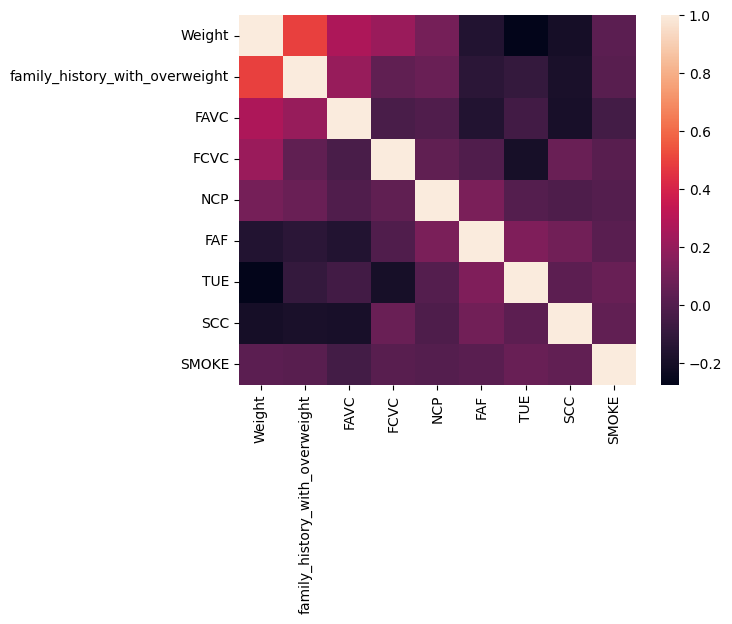

In [130]:
sns.heatmap(correlate_how)
plt.show()

### Base on the data *family_history_with_overweight* somehow correlate *Weight*. We don't yet know if it's negative or positivly. 
Correlation does not mean causation.

In [131]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,5,141,1,0,2.0,3.0,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,4,123,1,0,3.0,3.0,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,5,169,1,0,2.0,3.0,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,5,191,0,0,3.0,3.0,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,5,197,0,0,2.0,1.0,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,5,289,1,1,3.0,3.0,Sometimes,0,1,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,5,293,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III


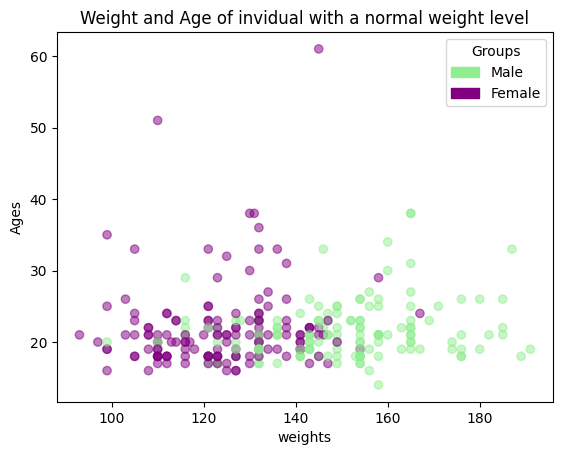

In [132]:
x = normalweight_levels.Weight
y = normalweight_levels.Age
plt.scatter(x,y,c = normalweight_levels['Gender'].map({'Male': 'lightgreen', 'Female': 'purple'}), 
    alpha=0.5
)

plt.title("Weight and Age of invidual with a normal weight level")
plt.xlabel("weights")
plt.ylabel("Ages")
male_norm = mpatches.Patch(color='lightgreen', label='Male')
female_norm = mpatches.Patch(color='purple', label='Female')

plt.legend(
    handles=[male_norm, female_norm],
    title="Groups")

In [133]:
smokes_thin = normalweight_levels[(normalweight_levels['SMOKE'] == 1)]
smokes_thin.head(5) # individual who smokes and normal weight 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21,4,123,1,0,3.0,3.0,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
25,Male,20,5,110,1,0,2.0,4.0,Frequently,1,2,0,3,2,no,Public_Transportation,Normal_Weight
43,Male,21,5,136,1,1,2.0,3.0,Sometimes,1,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
132,Female,19,5,123,1,1,3.0,3.0,Frequently,1,3,1,1,2,Frequently,Public_Transportation,Normal_Weight
160,Male,20,6,158,1,0,3.0,3.0,Sometimes,1,1,0,2,1,Sometimes,Public_Transportation,Normal_Weight


In [134]:
drinks_thin = normalweight_levels[(normalweight_levels['CALC'] == 'Frequently')]
drinks_thin.head(5) # individual who drinks and normal weight 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2,Male,23,5,169,1,0,2.0,3.0,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
8,Male,24,5,141,1,1,3.0,3.0,Sometimes,0,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
29,Male,23,5,154,0,1,2.0,3.0,Sometimes,0,2,0,2,2,Frequently,Walking,Normal_Weight
43,Male,21,5,136,1,1,2.0,3.0,Sometimes,1,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
91,Female,20,5,141,1,0,3.0,3.0,Always,0,2,1,0,1,Frequently,Public_Transportation,Normal_Weight


In [135]:
highcal_comsp = normalweight_levels[(df['FAVC'] == 1)]
highcal_comsp.head(5)
highcal_comsp.count() #total of people who eat high calory foods

C:\Users\viaud\AppData\Local\Temp\ipykernel_22220\103490029.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  highcal_comsp = normalweight_levels[(df['FAVC'] == 1)]


Gender                            208
Age                               208
Height                            208
Weight                            208
family_history_with_overweight    208
FAVC                              208
FCVC                              208
NCP                               208
CAEC                              208
SMOKE                             208
CH2O                              208
SCC                               208
FAF                               208
TUE                               208
CALC                              208
MTRANS                            208
NObeyesdad                        208
dtype: int64

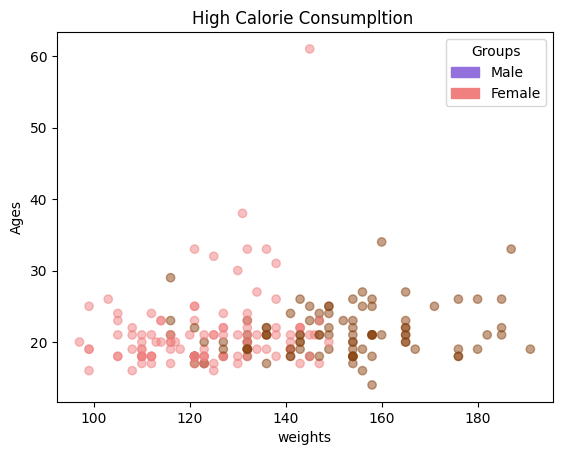

In [150]:
x = highcal_comsp.Weight
y = highcal_comsp.Age
plt.scatter(x,y,c = highcal_comsp['Gender'].map({'Male': 'saddlebrown', 'Female': 'lightcoral'}), 
    alpha=0.5
)

plt.title("High Calorie Consumpltion ")
plt.xlabel("weights")
plt.ylabel("Ages")
male_hi = mpatches.Patch(color='saddlebrown', label='Male')
female_hi = mpatches.Patch(color='lightcoral', label='Female')

plt.legend(
    handles=[male_fat, female_fat],
    title="Groups")

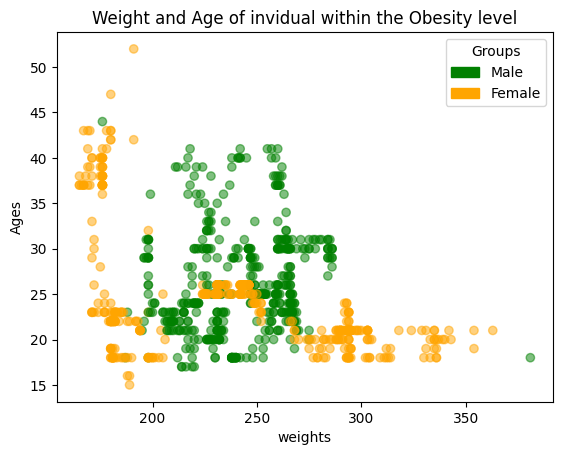

In [149]:
x = obesity_levels.Weight
y = obesity_levels.Age
plt.scatter(x,y,c = obesity_levels['Gender'].map({'Male': 'green', 'Female': 'orange'}), 
    alpha=0.5
)

plt.title("Weight and Age of invidual within the Obesity level")
plt.xlabel("weights")
plt.ylabel("Ages")
male_ob = mpatches.Patch(color='green', label='Male')
female_ob = mpatches.Patch(color='orange', label='Female')

plt.legend(
    handles=[male_ob, female_ob],
    title="Groups")

In [138]:
always_drinker = df[(df['CALC'] == 'Always')]
always_drinker # this is the min individual who is the only one that selected to drink always

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
26,Male,21,5,143,1,1,2.0,1.0,Frequently,0,2,0,1,2,Always,Walking,Normal_Weight


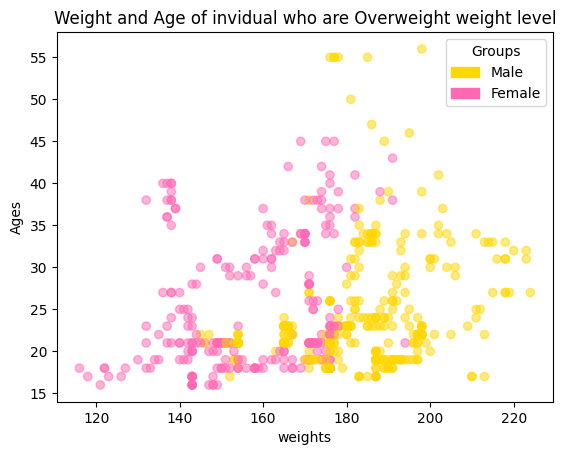

In [139]:
x = overweight_levels.Weight
y = overweight_levels.Age
plt.scatter(x,y,c = overweight_levels['Gender'].map({'Male': 'gold', 'Female': 'hotpink'}), 
    alpha=0.5
)

plt.title("Weight and Age of invidual who are Overweight weight level")
plt.xlabel("weights")
plt.ylabel("Ages")
male_ov = mpatches.Patch(color='gold', label='Male')
female_ov = mpatches.Patch(color='hotpink', label='Female')

plt.legend(
    handles=[male_ov, female_ov],
    title="Groups")

In [140]:
fam_was_fat = df[df['family_history_with_overweight'] == 1]

fam_was_fat # all who have fat people in their family history

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,5,141,1,0,2.0,3.0,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,4,123,1,0,3.0,3.0,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,5,169,1,0,2.0,3.0,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
6,Female,23,4,121,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Motorbike,Normal_Weight
8,Male,24,5,141,1,1,3.0,3.0,Sometimes,0,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,5,289,1,1,3.0,3.0,Sometimes,0,1,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,5,293,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III


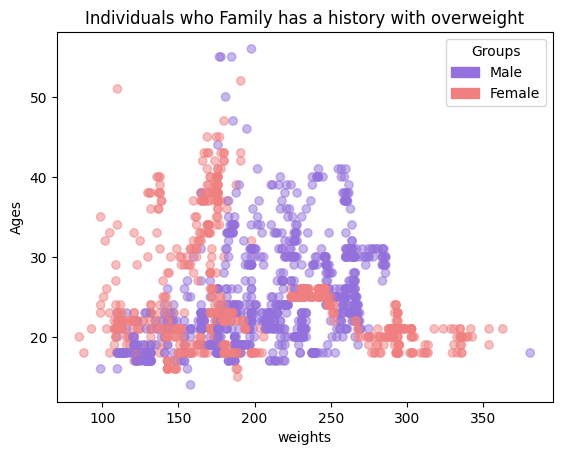

In [141]:
x = fam_was_fat.Weight
y = fam_was_fat.Age
plt.scatter(x,y,c = fam_was_fat['Gender'].map({'Male': 'mediumpurple', 'Female': 'lightcoral'}), 
    alpha=0.5
)

plt.title("Individuals who Family has a history with overweight")
plt.xlabel("weights")
plt.ylabel("Ages")
male_fat = mpatches.Patch(color='mediumpurple', label='Male')
female_fat = mpatches.Patch(color='lightcoral', label='Female')

plt.legend(
    handles=[male_fat, female_fat],
    title="Groups")

In [142]:
df.sort_values(by =['CALC']).head(10) # here you can sort the data by any header

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
26,Male,21,5,143,1,1,2.000000,1.000000,Frequently,0,2,0,1,2,Always,Walking,Normal_Weight
132,Female,19,5,123,1,1,3.000000,3.000000,Frequently,1,3,1,1,2,Frequently,Public_Transportation,Normal_Weight
141,Male,25,6,145,0,1,3.000000,3.000000,Always,0,2,0,2,0,Frequently,Public_Transportation,Normal_Weight
799,Female,19,5,175,1,1,2.000000,1.146794,Sometimes,0,3,0,1,1,Frequently,Public_Transportation,Overweight_Level_I
1080,Female,28,5,171,1,1,3.000000,3.000000,Sometimes,0,1,0,1,1,Frequently,Automobile,Overweight_Level_II
801,Female,18,5,169,1,1,2.838969,3.000000,Sometimes,0,2,0,1,1,Frequently,Public_Transportation,Overweight_Level_I
133,Female,61,5,145,0,1,3.000000,3.000000,Always,0,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
129,Male,27,5,171,0,1,3.000000,3.000000,Sometimes,0,3,0,1,1,Frequently,Public_Transportation,Overweight_Level_II
125,Male,18,5,176,1,1,2.000000,3.000000,Always,0,2,0,0,0,Frequently,Public_Transportation,Overweight_Level_I
121,Male,23,6,209,1,1,1.000000,3.000000,Frequently,0,2,0,0,2,Frequently,Public_Transportation,Overweight_Level_II


In [143]:
df.iloc[:,1:6] # select specific row and or column

,Age,Height,Weight,family_history_with_overweight,FAVC
0,21,5,141,1,0
1,21,4,123,1,0
2,23,5,169,1,0
3,27,5,191,0,0
4,22,5,197,0,0
...,...,...,...,...,...
2106,20,5,289,1,1
2107,21,5,294,1,1
2108,22,5,294,1,1
2109,24,5,293,1,1


In [144]:
eat_alot = df[df['NCP']> 2]

weightsize = df[
    (df['family_history_with_overweight'] == 1) &
    (df['NCP'].isin(eat_alot['NCP']))
]

weightsize # people who are fat and eats more than 2 meals a day

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,5,141,1,0,2.0,3.0,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,4,123,1,0,3.0,3.0,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,5,169,1,0,2.0,3.0,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
6,Female,23,4,121,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Motorbike,Normal_Weight
8,Male,24,5,141,1,1,3.0,3.0,Sometimes,0,2,0,1,1,Frequently,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,5,289,1,1,3.0,3.0,Sometimes,0,1,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,5,294,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,5,293,1,1,3.0,3.0,Sometimes,0,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III


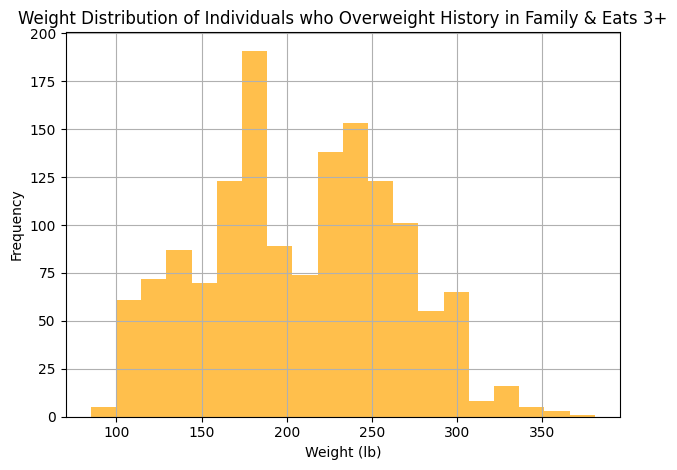

In [145]:
weightsize['Weight'].plot(
    kind='hist',
    bins=20,
    color='orange',
    alpha=0.7,
    title='Weight Distribution of Individuals who Overweight History in Family & Eats 3+'
)

plt.xlabel('Weight (lb)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


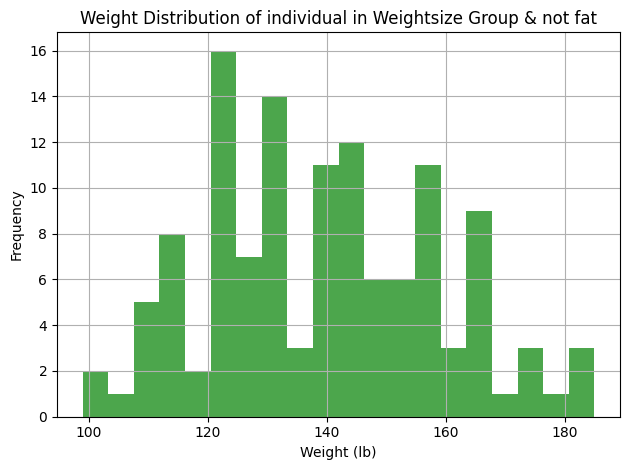

In [146]:
beat_the_odds = weightsize[weightsize['NObeyesdad'] == 'Normal_Weight']

beat_the_odds['Weight'].plot(
    kind='hist',
    bins=20,
    color='green',
    alpha=0.7,
    title='Weight Distribution of individual in Weightsize Group & not fat'
)

plt.xlabel('Weight (lb)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


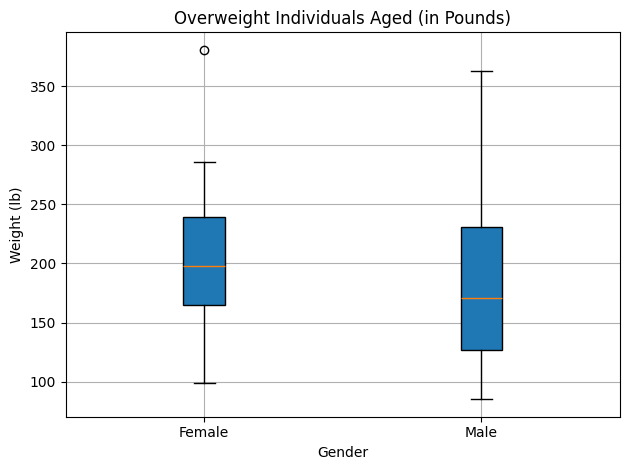

In [148]:

male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

x = male['Weight']
y = female['Weight']

data = [x,y]

plt.boxplot(data, patch_artist=True)

colors = ['pink', 'lightblue']

plt.xticks([1, 2], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Weight (lb)')
plt.title('Overweight Individuals Aged (in Pounds)')
plt.grid(True)
plt.tight_layout()
plt.show()